# Model 3: Random Forest Classifier
- Random Forest is an ensemble learning method used for classification, regression, and other tasks.
- It operates by constructing multiple decision trees during training.

In [22]:
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [23]:
# Obtain datasets, train & test
train = pd.read_csv("./datasets/10_train.csv")
test = pd.read_csv("./datasets/10_test.csv")

In [27]:
train.info()
print()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [14]:
# Preprocess dataset
train.head()

# Class Label is the "label" column, so drop it in the Training dataset.
y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1)

# Delete the original dataset to free memory
del train

# Calculate the frequence of each unique value in `y_train` series.
y_train.value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

In [15]:
# Model: Train
model = RandomForestClassifier()
print('Number of Trees used: ', model.n_estimators)
model.fit(X_train,y_train)

Number of Trees used:  100


RandomForestClassifier()

In [16]:
# Model: Predict
predict=model.predict(X_train)
print(f"Predictions: \n{predict}")

Predictions: 
[1 0 1 ... 7 6 9]


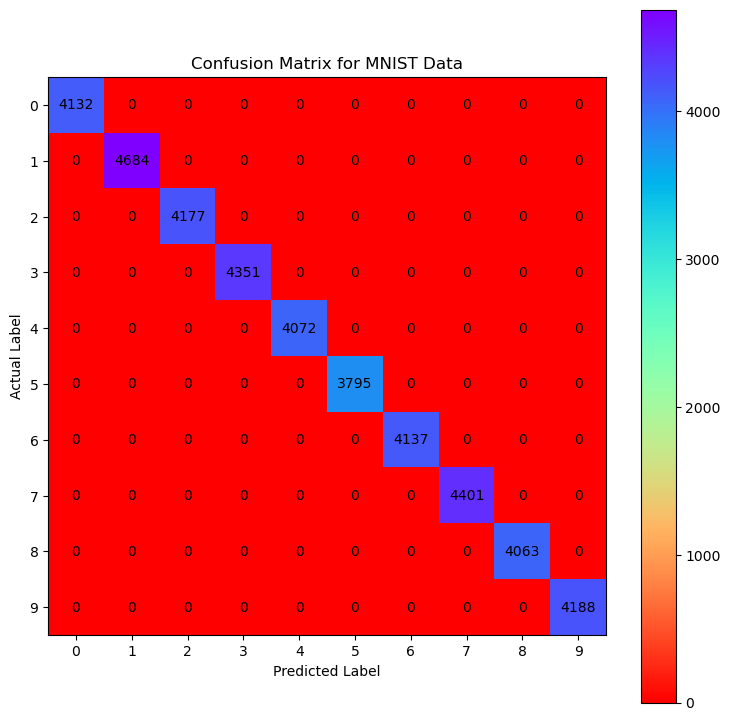

In [19]:
# Show Confusion Matrix
cm = confusion_matrix(y_train,model.predict(X_train))

plt.figure(figsize=(9,9))
plt.imshow(cm,cmap='rainbow_r')
plt.title("Confusion Matrix for MNIST Data")
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.colorbar()
width,height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]),xy=(y,x),horizontalalignment='center',verticalalignment='center')
plt.show()

In [20]:
# Calculate Accuracy
train_accuracy = accuracy_score(y_train,model.predict(X_train))
print("Training Accuracy: ",train_accuracy)

Training Accuracy:  1.0
